___
# Ciência dos Dados - PROJETO 1

REBECA TRIÑANES

Como o passar dos anos influenciou na compra de TV's entre pessoas de diferentes classes sociais? 
(1-3 salários mínimos, 4-6 salários mínimos, 7-9 salários mínimos)

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/macbook


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dados2015 = pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados2014 = pd.read_csv('DOM2014csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
#dados2015

In [5]:
#delimitando a tabela com os dados que eu quero
dados2015 = dados2015.loc[(dados2015.UF==29) & (dados2015.V0202==2) & (dados2015.V4105==1),["UF","V0202","V0207","V4105","V0226","V02273","V02274","V4614"]]

#transformando int em categoria
dados2015.UF = dados2015.UF.astype("category")
dados2015.V0202 = dados2015.V0202.astype("category")
dados2015.V0207 = dados2015.V0202.astype("category")
dados2015.V4105 = dados2015.V4105.astype("category")
dados2015.V0226 = dados2015.V0226.astype("category")
dados2015.V02273 = dados2015.V02273.astype("category")
dados2015.V02274 = dados2015.V02274.astype("category")


#renomeando as linhas
dados2015.UF.cat.categories = ("Bahia")
dados2015.V0202.cat.categories = ("Casa")
dados2015.V0207.cat.categories = ("Próprio")
dados2015.V4105.cat.categories = ("Urbana")
dados2015.V0226.cat.categories = ("Sim","Não")
dados2015.V02273.cat.categories = ("Sim","Não","Não Sabe")
dados2015.V02274.cat.categories = ("Sim","Não","Não Sabe")

#renomemando as colunas
dados2015 = dados2015.rename(columns={"UF":"REGIAO","V4614": "RENDA","V0202":"DOMICILIO","V0207":"CONDOCUP","V4105":"AREA","V0226":"TVCOR","V02273":"TVDIGITAL","V02274":"TVANTENA"})

dados2015 = dados2015[pd.notnull(dados2015["TVDIGITAL"])]
dados2015 = dados2015[pd.notnull(dados2015["TVANTENA"])]
dados2015 = dados2015[dados2015.RENDA<9999999999]

dados2015                              
               

,REGIAO,DOMICILIO,CONDOCUP,AREA,TVCOR,TVDIGITAL,TVANTENA,RENDA
53018,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,3279.0
53020,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,788.0
53021,Bahia,Casa,Próprio,Urbana,Sim,Não,Não,1576.0
53022,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,4750.0
53023,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,1188.0
53024,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,7450.0
53025,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,3900.0
53026,Bahia,Casa,Próprio,Urbana,Sim,Não,Não,312.0
53027,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,1576.0
53028,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,788.0


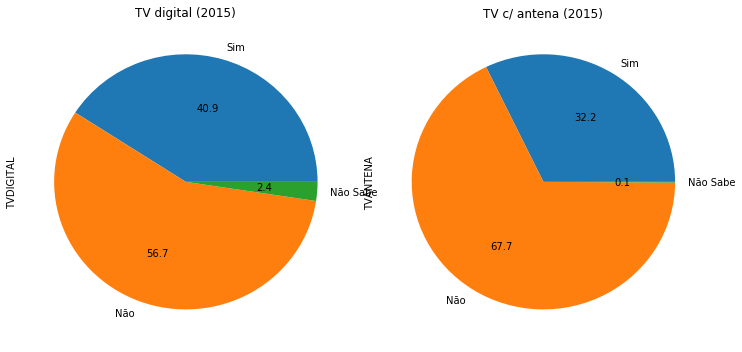

In [6]:
dados20151 = dados2015[(dados2015.RENDA >= 788) & (dados2015.RENDA < 2364)]

tv_aberta1 = (dados20151.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena1 = (dados20151.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

                         
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = tv_aberta1.plot(kind='pie',title='TV digital (2015)',autopct='%.1f')


plt.subplot(132)
plot = tv_antena1.plot(kind='pie',title='TV c/ antena (2015)',autopct='%.1f')

plt.tight_layout()
plt.show()

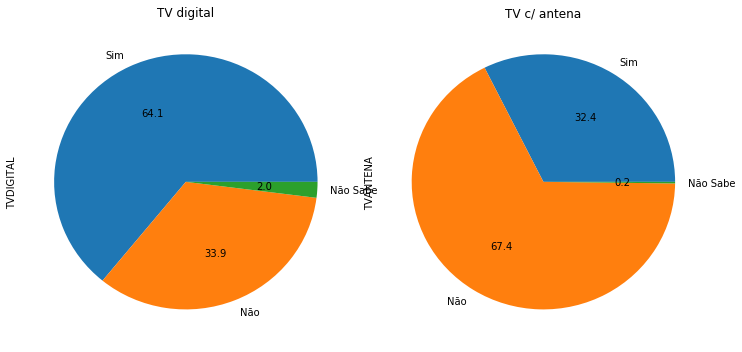

In [7]:
dados20152 = dados2015[(dados2015.RENDA >= 3152) & (dados2015.RENDA < 4728)]

tv_aberta2 = (dados20152.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena2 = (dados20152.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

                         
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = tv_aberta2.plot(kind='pie',title='TV digital',autopct='%.1f')

plt.subplot(132)
plot = tv_antena2.plot(kind='pie',title='TV c/ antena',autopct='%.1f')

plt.tight_layout()
plt.show()

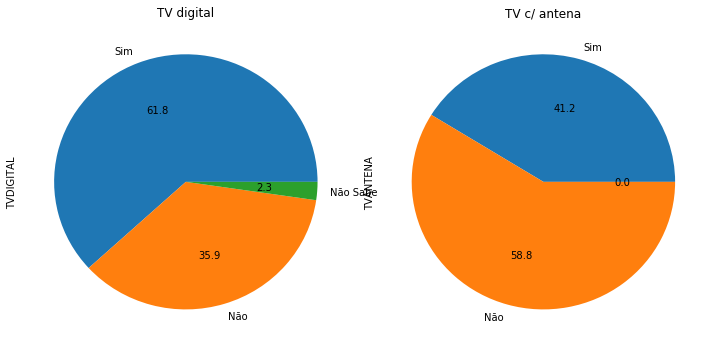

In [8]:
dados20153 = dados2015[(dados2015.RENDA >= 5516) & (dados2015.RENDA < 7092)]

tv_aberta3 = (dados20153.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena3 = (dados20153.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

                         
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = tv_aberta3.plot(kind='pie',title='TV digital',autopct='%.1f')

plt.subplot(132)
plot = tv_antena3.plot(kind='pie',title='TV c/ antena',autopct='%.1f')

plt.tight_layout()
plt.show()

In [9]:
#dados2014

In [10]:
#delimitando a tabela com os dados que eu quero
dados2014 = dados2014.loc[(dados2014.UF==29) & (dados2014.V0202==2) & (dados2014.V4105==1),["UF","V0202","V0207","V4105","V0226","V02273","V02274","V4614"]]

#transformando int em categoria
dados2014.UF = dados2014.UF.astype("category")
dados2014.V0202 = dados2014.V0202.astype("category")
dados2014.V0207 = dados2014.V0202.astype("category")
dados2014.V4105 = dados2014.V4105.astype("category")
dados2014.V0226 = dados2014.V0226.astype("category")
dados2014.V02273 = dados2014.V02273.astype("category")
dados2014.V02274 = dados2014.V02274.astype("category")


#renomeando as linhas
dados2014.UF.cat.categories = ("Bahia")
dados2014.V0202.cat.categories = ("Casa")
dados2014.V0207.cat.categories = ("Próprio")
dados2014.V4105.cat.categories = ("Urbana")
dados2014.V0226.cat.categories = ("Sim","Não")
dados2014.V02273.cat.categories = ("Sim","Não","Não Sabe")
dados2014.V02274.cat.categories = ("Sim","Não","Não Sabe")

#renomemando as colunas
dados2014 = dados2014.rename(columns={"UF":"REGIAO","V4614": "RENDA","V0202":"DOMICILIO","V0207":"CONDOCUP","V4105":"AREA","V0226":"TVCOR","V02273":"TVDIGITAL","V02274":"TVANTENA"})

dados2014 = dados2014[pd.notnull(dados2014["TVDIGITAL"])]
dados2014 = dados2014[pd.notnull(dados2014["TVANTENA"])]

dados2014                              
               

,REGIAO,DOMICILIO,CONDOCUP,AREA,TVCOR,TVDIGITAL,TVANTENA,RENDA
53017,Bahia,Casa,Próprio,Urbana,Sim,Sim,Não,2724.0
53019,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,2248.0
53020,Bahia,Casa,Próprio,Urbana,Sim,Não,Não,350.0
53021,Bahia,Casa,Próprio,Urbana,Sim,Não,Não,2700.0
53022,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,724.0
53023,Bahia,Casa,Próprio,Urbana,Sim,Sim,Sim,1448.0
53024,Bahia,Casa,Próprio,Urbana,Sim,Não,Não,1124.0
53025,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,134.0
53026,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,2172.0
53027,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,11448.0


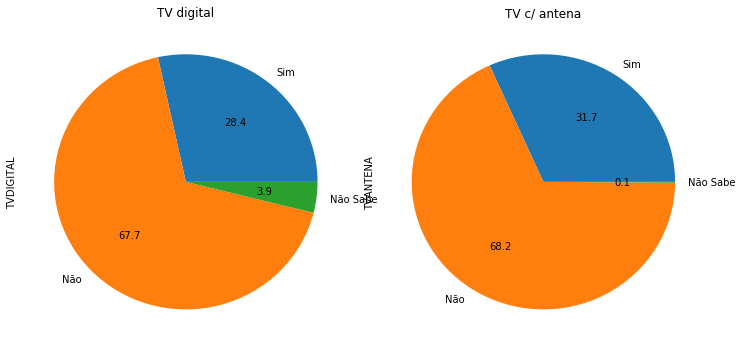

In [11]:
dados20141 = dados2014[(dados2014.RENDA >= 724) & (dados2014.RENDA < 1448)]

tv_aberta4 = (dados20141.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena4 = (dados20141.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)
                         
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = tv_aberta4.plot(kind='pie',title='TV digital',autopct='%.1f')

plt.subplot(132)
plot = tv_antena4.plot(kind='pie',title='TV c/ antena',autopct='%.1f')

plt.tight_layout()
plt.show()



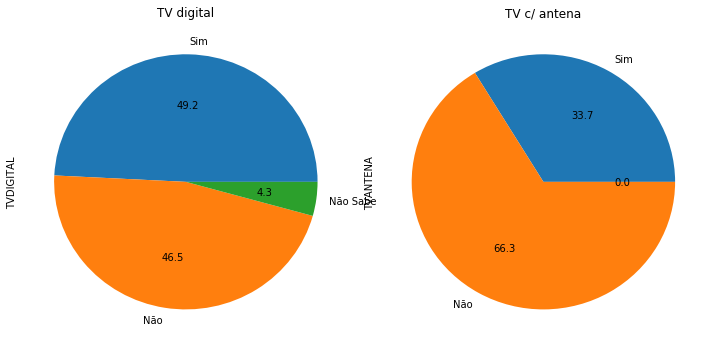

In [12]:
dados20142 = dados2014[(dados2014.RENDA >= 2172) & (dados2014.RENDA < 3680)]

tv_aberta5 = (dados20142.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena5 = (dados20142.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

                         
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = tv_aberta5.plot(kind='pie',title='TV digital',autopct='%.1f')

plt.subplot(132)
plot = tv_antena5.plot(kind='pie',title='TV c/ antena',autopct='%.1f')

plt.tight_layout()
plt.show()

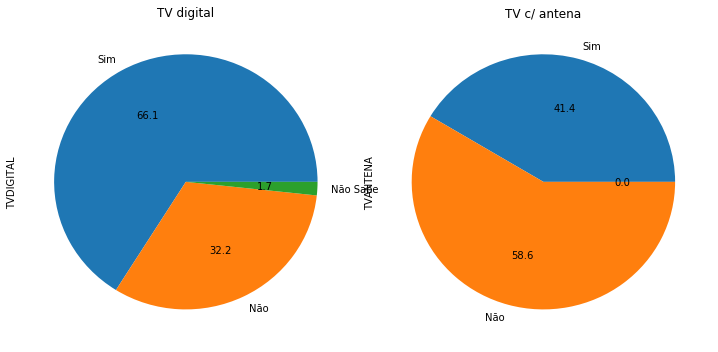

In [13]:
dados20143 = dados2014[(dados2014.RENDA >= 4344) & (dados2014.RENDA < 6516)]

tv_aberta6 = (dados20143.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena6 = (dados20143.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

                         
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = tv_aberta6.plot(kind='pie',title='TV digital',autopct='%.1f')

plt.subplot(132)
plot = tv_antena6.plot(kind='pie',title='TV c/ antena',autopct='%.1f')

plt.tight_layout()
plt.show()

In [34]:
'''fig = plt.figure(figsize=(10, 6))

plt.subplot(131)
plot = tv_aberta4.plot(kind='bar',title='TV digital 2014/1',color=('b','r','g'))
plot.set_ylim([0, 100])

plt.subplot(132)
plot = tv_aberta1.plot(kind='bar',title='TV digital 2015/1',color=('b','r','g'))
plot.set_ylim([0, 100])

plt.tight_layout()
plt.show()'''



"fig = plt.figure(figsize=(10, 6))\n\nplt.subplot(131)\nplot = tv_aberta4.plot(kind='bar',title='TV digital 2014/1',color=('b','r','g'))\nplot.set_ylim([0, 100])\n\nplt.subplot(132)\nplot = tv_aberta1.plot(kind='bar',title='TV digital 2015/1',color=('b','r','g'))\nplot.set_ylim([0, 100])\n\nplt.tight_layout()\nplt.show()"

In [35]:
'''fig = plt.figure(figsize=(10, 6))

plt.subplot(131)
plot = tv_aberta5.plot(kind='bar',title='TV digital 2014/2',color=('b','r','g'))
plot.set_ylim([0, 100])

plt.subplot(132)
plot = tv_aberta2.plot(kind='bar',title='TV digital 2015/2',color=('b','r','g'))
plot.set_ylim([0, 100])

plt.tight_layout()
plt.show()'''





"fig = plt.figure(figsize=(10, 6))\n\nplt.subplot(131)\nplot = tv_aberta5.plot(kind='bar',title='TV digital 2014/2',color=('b','r','g'))\nplot.set_ylim([0, 100])\n\nplt.subplot(132)\nplot = tv_aberta2.plot(kind='bar',title='TV digital 2015/2',color=('b','r','g'))\nplot.set_ylim([0, 100])\n\nplt.tight_layout()\nplt.show()"

In [36]:
'''fig = plt.figure(figsize=(10, 6))

plt.subplot(131)
plot = tv_aberta6.plot(kind='bar',title='TV digital 2014/3',color=('b','r','g'))
plot.set_ylim([0, 100])

plt.subplot(132)
plot = tv_aberta3.plot(kind='bar',title='TV digital 2015/3',color=('b','r','g'))
plot.set_ylim([0, 100])

plt.tight_layout()
plt.show()'''

"fig = plt.figure(figsize=(10, 6))\n\nplt.subplot(131)\nplot = tv_aberta6.plot(kind='bar',title='TV digital 2014/3',color=('b','r','g'))\nplot.set_ylim([0, 100])\n\nplt.subplot(132)\nplot = tv_aberta3.plot(kind='bar',title='TV digital 2015/3',color=('b','r','g'))\nplot.set_ylim([0, 100])\n\nplt.tight_layout()\nplt.show()"

In [37]:
'''fig = plt.figure(figsize=(10, 6))

plt.subplot(131)
plot = tv_antena4.plot(kind='bar',title='TV c/ antena 2014/1',color=('b','r','g'))
plot.set_ylim([0, 100])

plt.subplot(132)
plot = tv_antena1.plot(kind='bar',title='TV c/ antena 2015/1',color=('b','r','g'))
plot.set_ylim([0, 100])

plt.tight_layout()
plt.show()'''

"fig = plt.figure(figsize=(10, 6))\n\nplt.subplot(131)\nplot = tv_antena4.plot(kind='bar',title='TV c/ antena 2014/1',color=('b','r','g'))\nplot.set_ylim([0, 100])\n\nplt.subplot(132)\nplot = tv_antena1.plot(kind='bar',title='TV c/ antena 2015/1',color=('b','r','g'))\nplot.set_ylim([0, 100])\n\nplt.tight_layout()\nplt.show()"

In [38]:
'''fig = plt.figure(figsize=(10, 6))

plt.subplot(131)
plot = tv_antena5.plot(kind='bar',title='TV c/ antena 2014/2',color=('b','r','g'))
plot.set_ylim([0, 100])

plt.subplot(132)
plot = tv_antena2.plot(kind='bar',title='TV c/ antena 2015/2',color=('b','r','g'))
plot.set_ylim([0, 100])

plt.tight_layout()
plt.show()'''



"fig = plt.figure(figsize=(10, 6))\n\nplt.subplot(131)\nplot = tv_antena5.plot(kind='bar',title='TV c/ antena 2014/2',color=('b','r','g'))\nplot.set_ylim([0, 100])\n\nplt.subplot(132)\nplot = tv_antena2.plot(kind='bar',title='TV c/ antena 2015/2',color=('b','r','g'))\nplot.set_ylim([0, 100])\n\nplt.tight_layout()\nplt.show()"

In [39]:
'''fig = plt.figure(figsize=(10, 6))

plt.subplot(131)
plot = tv_antena6.plot(kind='bar',title='TV c/ antena 2014/3',color=('b','r','g'))
plot.set_ylim([0, 100])

plt.subplot(132)
plot = tv_antena3.plot(kind='bar',title='TV c/ antena 2015/3',color=('b','r','g'))
plot.set_ylim([0, 100])

plt.tight_layout()
plt.show()'''

"fig = plt.figure(figsize=(10, 6))\n\nplt.subplot(131)\nplot = tv_antena6.plot(kind='bar',title='TV c/ antena 2014/3',color=('b','r','g'))\nplot.set_ylim([0, 100])\n\nplt.subplot(132)\nplot = tv_antena3.plot(kind='bar',title='TV c/ antena 2015/3',color=('b','r','g'))\nplot.set_ylim([0, 100])\n\nplt.tight_layout()\nplt.show()"

In [20]:
#RENDA_cat = pd.cut(dados2015.RENDA, bins=10)
dados2015.RENDA.describe()

count      5809.000000
mean       2136.135307
std        3669.927570
min           0.000000
25%         845.000000
50%        1576.000000
75%        2400.000000
max      201900.000000
Name: RENDA, dtype: float64

In [21]:
faixa = range(788,7092,1576)
RENDA_cat = pd.cut(dados2015.RENDA, bins=faixa)
RENDA_cat.value_counts(sort=False, normalize=True)*100

(788, 2364]     71.329673
(2364, 3940]    21.293865
(3940, 5516]     7.376462
Name: RENDA, dtype: float64

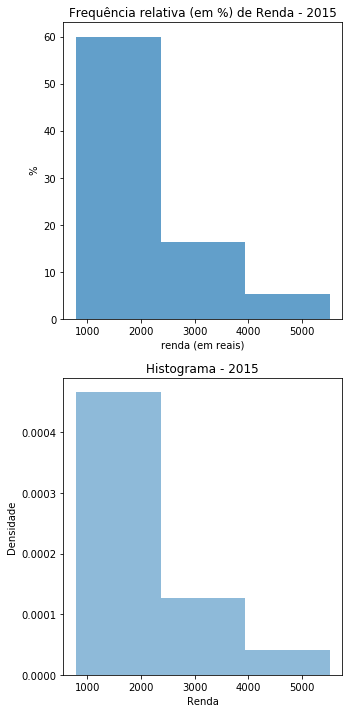

In [33]:
from numpy import zeros_like

fig = plt.figure(figsize=(5,12))
plt.subplot(211)
plot = dados2015.RENDA.plot.hist(bins=faixa,title='Frequência relativa (em %) de Renda - 2015', weights=zeros_like(dados2015.RENDA)+1./dados2015.RENDA.size*100, alpha=0.7)
plt.ylabel(' %')
plt.xlabel('renda (em reais)')

plt.subplot(212)
plot = dados2015.RENDA.plot.hist(bins=faixa, title='Histograma - 2015', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')


___
## Conclusão 

Descreva aqui suas conclusões!